In [1]:
import chaospy as cp
import uncertainpy as un
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from prettyplot import *

### Utility functions

In [2]:
def str_to_latex(text):
    if "_" in text:
        txt = text.split("_")
        return "$" + txt[0] + "_{\mathrm{" + "-".join(txt[1:]) + "}}$"
    else:
        return text

In [3]:
def list_to_latex(texts):
    tmp = []
    for txt in texts:
        tmp.append(str_to_latex(txt))

    return tmp

# Coffe cup plots

## Mean and variance

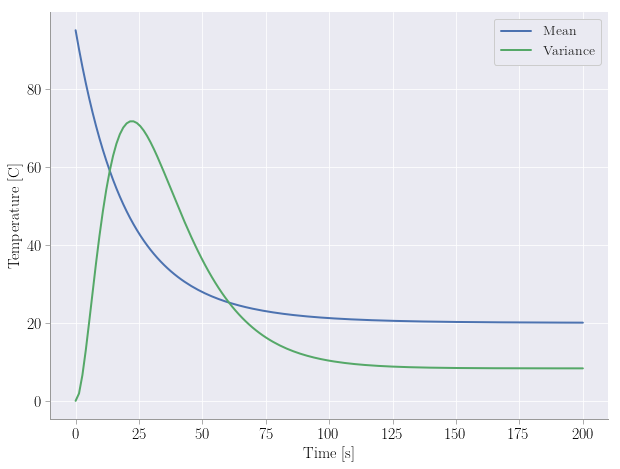

In [217]:
coffe_cup = un.Data("data/coffee_cup.h5")
time = coffe_cup["coffee_cup"]["time"]
mean = coffe_cup["coffee_cup"]["mean"]
variance = coffe_cup["coffee_cup"]["variance"]

labels = coffe_cup.get_labels("coffee_cup")
xlabel, ylabel = labels

title = ""
ax = prettyPlot(time, mean,
                title,
                xlabel,
                ylabel,
                palette="deep")

prettyPlot(time, variance, ax=ax)

plt.legend(["Mean", "Variance"])
plt.savefig("figures/coffee_cup_mean.eps")
plt.show()

## Coffee cup prediction interval

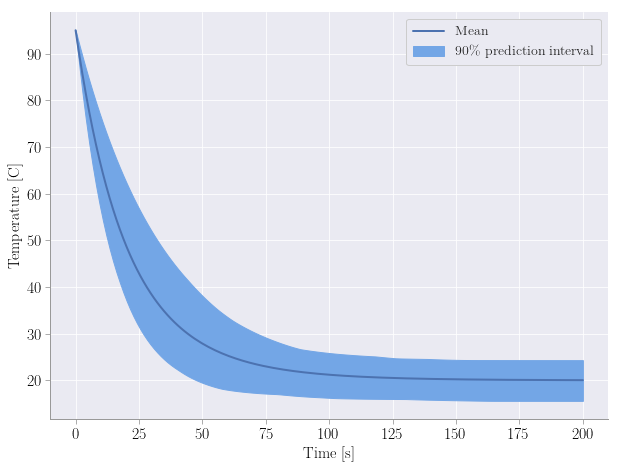

In [218]:
coffe_cup = un.Data("data/coffee_cup.h5")
time = coffe_cup["coffee_cup"]["time"]
mean = coffe_cup["coffee_cup"]["mean"]
percentile_5 = coffe_cup["coffee_cup"]["percentile_5"]
percentile_95 = coffe_cup["coffee_cup"]["percentile_95"]

labels = coffe_cup.get_labels("coffee_cup")
xlabel, ylabel = labels


prettyPlot(time, mean,
           xlabel=xlabel,
           ylabel=ylabel,
           color=0,
           palette="deep")

colors = get_current_colormap()
plt.fill_between(time,
                 percentile_5,
                 percentile_95,
                 color=(0.45, 0.65, 0.9))


plt.legend(["Mean", "90\% prediction interval"])
plt.savefig("figures/coffee_cup_confidence.eps")
plt.show()

## Coffee cup mean, variance and prediction interval

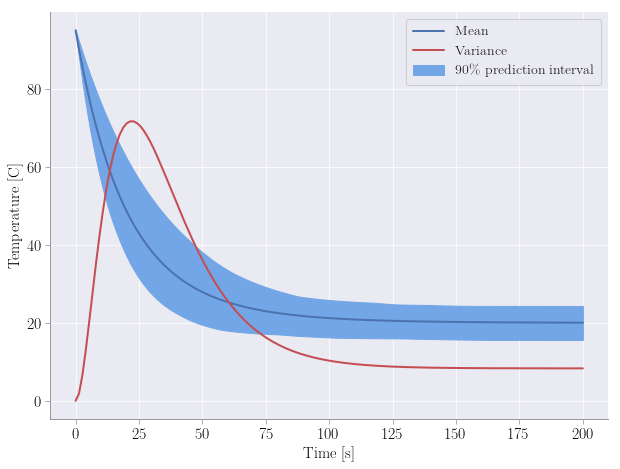

In [219]:
coffe_cup = un.Data("data/coffee_cup.h5")
time = coffe_cup["coffee_cup"]["time"]
mean = coffe_cup["coffee_cup"]["mean"]
variance = coffe_cup["coffee_cup"]["variance"]
percentile_5 = coffe_cup["coffee_cup"]["percentile_5"]
percentile_95 = coffe_cup["coffee_cup"]["percentile_95"]

labels = coffe_cup.get_labels("coffee_cup")
xlabel, ylabel = labels

# Plotting mean and variance
ax = prettyPlot(time, mean,
           xlabel=xlabel,
           ylabel=ylabel,
           color=0,
           palette="deep")


# Plotting prediction interval
colors = get_current_colormap()
ax.fill_between(time,
                percentile_5,
                percentile_95,
                color=(0.45, 0.65, 0.9))

prettyPlot(time, variance,color=2, ax=ax, palette="deep")

plt.legend(["Mean", "Variance", "90\% prediction interval"])
plt.savefig("figures/coffee_cup_variance_prediction.eps")
plt.show()

## First order Sobol indices

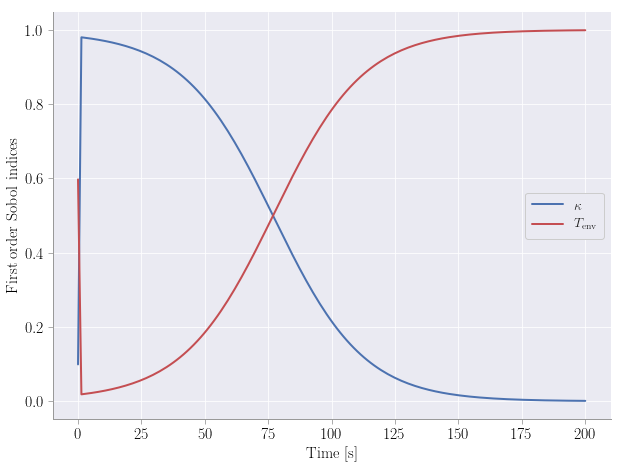

In [322]:
coffe_cup = un.Data("data/coffee_cup.h5")
time = coffe_cup["coffee_cup"]["time"]
sensitivity = coffe_cup["coffee_cup"]["sensitivity_1"]

labels = coffe_cup.get_labels("coffee_cup")
xlabel, ylabel = labels

prettyPlot(time, sensitivity[0],
           xlabel=xlabel,
           ylabel="First order Sobol indices",
           palette="deep")

prettyPlot(time, sensitivity[1],
           palette="deep",
           color=2,
           new_figure=False)

plt.legend(["$\\kappa$", str_to_latex(coffe_cup.uncertain_parameters[1])])
plt.savefig("figures/coffee_cup_sensitivity.eps")
plt.show()

# Dependent coffee cup

## Prediction interval

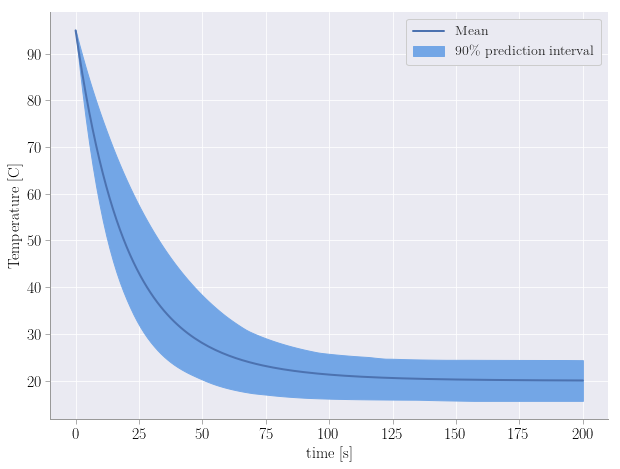

In [235]:
coffe_cup_dependent = un.Data("data/coffee_cup_dependent.h5")
t = coffe_cup_dependent["coffee_cup_dependent"]["time"]
E = coffe_cup_dependent["coffee_cup_dependent"]["mean"]
p_05 = coffe_cup_dependent["coffee_cup_dependent"]["percentile_5"]
p_95 = coffe_cup_dependent["coffee_cup_dependent"]["percentile_95"]

labels = coffe_cup_dependent.get_labels("coffee_cup_dependent")
xlabel, ylabel = labels


prettyPlot(t, E,
           xlabel=xlabel,
           ylabel=ylabel,
           color=0,
           palette="deep")

colors = get_current_colormap()
plt.fill_between(t,
                 p_05,
                 p_95,
                 color=(0.45, 0.65, 0.9))


plt.legend(["Mean", "90\% prediction interval"])
plt.savefig("figures/coffee_cup_dependent_confidence.eps")
plt.show()

## Sensitivity

### Alternative 1

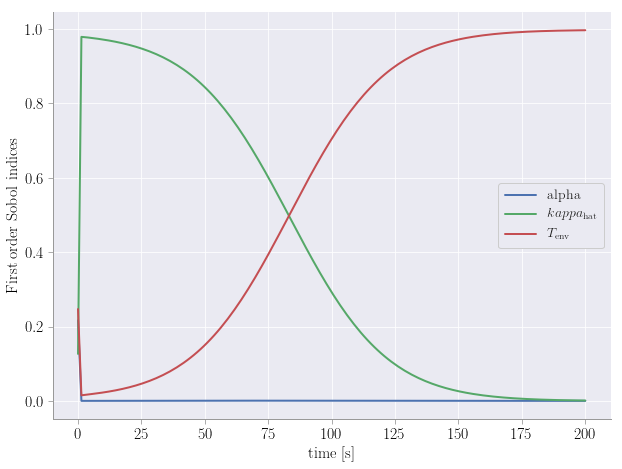

In [236]:
coffe_cup_dependent = un.Data("data/coffee_cup_dependent.h5")
time = coffe_cup_dependent["coffee_cup_dependent"]["time"]
sensitivity = coffe_cup_dependent["coffee_cup_dependent"]["sensitivity_1"]

labels = coffe_cup_dependent.get_labels("coffee_cup_dependent")
xlabel, ylabel = labels

prettyPlot(time, sensitivity[0],
           xlabel=xlabel,
           ylabel="First order Sobol indices",
           palette="deep")

prettyPlot(time, sensitivity[1],
           palette="deep",
           new_figure=False)

prettyPlot(time, sensitivity[2],
           palette="deep",
           new_figure=False)

plt.legend([str_to_latex(coffe_cup_dependent.uncertain_parameters[0]),
            str_to_latex(coffe_cup_dependent.uncertain_parameters[1]),
            str_to_latex(coffe_cup_dependent.uncertain_parameters[2])])
plt.savefig("figures/coffee_cup_dependent_sensitivity.eps")
plt.show()

### Alternative 2

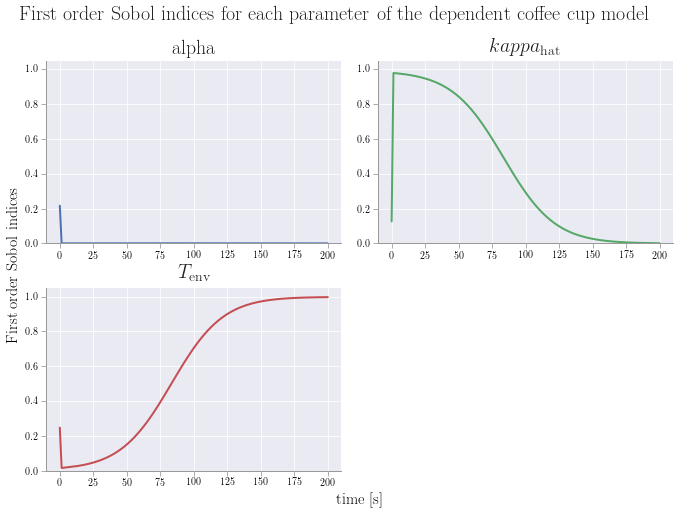

In [237]:
coffe_cup_dependent = un.Data("data/coffee_cup_dependent.h5")
t = coffe_cup_dependent["coffee_cup_dependent"]["time"]
sensitivity = coffe_cup_dependent["coffee_cup_dependent"]["sensitivity_1"]

labels = coffe_cup_dependent.get_labels("coffee_cup_dependent")
xlabel, ylabel = labels



nr_plots = len(coffe_cup_dependent.uncertain_parameters)
grid_size = np.ceil(np.sqrt(nr_plots))
grid_x_size = int(grid_size)
grid_y_size = int(np.ceil(nr_plots/float(grid_x_size)))

set_style("seaborn-darkgrid")
fig, axes = plt.subplots(nrows=grid_y_size, ncols=grid_x_size, squeeze=False, sharex='col', sharey='row')

# Add a larger subplot to use to set a common xlabel and ylabel
set_style("seaborn-white")
ax = fig.add_subplot(111, zorder=-10)
spines_color(ax, edges={"top": "None", "bottom": "None",
                        "right": "None", "left": "None"})
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.set_xlabel(xlabel)
ax.set_ylabel('First order Sobol indices') 


for i in range(0, grid_x_size*grid_y_size):
    nx = i % grid_x_size
    ny = int(np.floor(i/float(grid_x_size)))

    ax = axes[ny][nx]

    if i < nr_plots:
        prettyPlot(t, sensitivity[i],
                   title=str_to_latex(coffe_cup_dependent.uncertain_parameters[i]), 
                   color=i,
                   nr_colors=nr_plots,
                   ax=ax,
                   palette="deep")

        ax.set_ylim([0, 1.05])
        ax.tick_params(labelsize=10)
    else:
        ax.axis("off")

title = "First order Sobol indices for each parameter of the dependent coffee cup model"
plt.suptitle(title, fontsize=titlesize)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
# plt.savefig("figures/coffee_cup_dependent_sensitivity.eps")
plt.show()

## Alternative 3

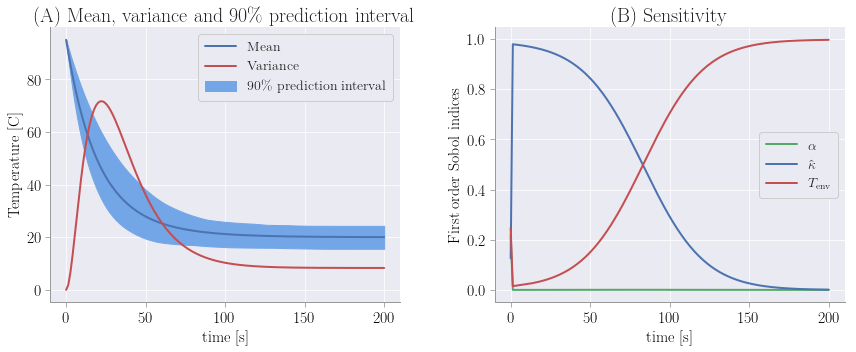

In [302]:
coffe_cup_dependent = un.Data("data/coffee_cup_dependent.h5")
time = coffe_cup_dependent["coffee_cup_dependent"]["time"]
sensitivity = coffe_cup_dependent["coffee_cup_dependent"]["sensitivity_1"]

labels = coffe_cup_dependent.get_labels("coffee_cup_dependent")
xlabel, ylabel = labels


set_style("seaborn-darkgrid")
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))


# Plotting mean and variance
title = "(A) Mean, variance and 90\\% prediction interval"

# Plotting prediction interval
prettyPlot(time, mean,
           title=title,
           xlabel=xlabel,
           ylabel=ylabel,
           color=0,
           palette="deep",
           ax=axes[0])

colors = get_current_colormap()
axes[0].fill_between(time,
                     percentile_5,
                     percentile_95,
                     color=(0.45, 0.65, 0.9))

prettyPlot(time, variance,color=2, ax=axes[0], palette="deep")

axes[0].legend(["Mean", "Variance", "90\% prediction interval"])


title = "(B) Sensitivity"
prettyPlot(time, sensitivity[0],
           title=title,
           xlabel=xlabel,
           ylabel="First order Sobol indices",
           palette="deep",
           ax=axes[1],
           color=1)

prettyPlot(time, sensitivity[1],
           palette="deep",
           ax=axes[1],
           color=0)

prettyPlot(time, sensitivity[2],
           palette="deep",
           ax=axes[1],
           color=2)

#axes[1].legend([str_to_latex(coffe_cup_dependent.uncertain_parameters[0]),
#                str_to_latex(coffe_cup_dependent.uncertain_parameters[1]),
#                str_to_latex(coffe_cup_dependent.uncertain_parameters[2])])

axes[1].legend(["$\\alpha$", "$\\hat{\\kappa}$", "$T_{\\mathrm{env}}$"])

plt.tight_layout()
plt.savefig("figures/coffee_cup_dependent.eps")
plt.show()

# Hodgkin-Huxley plots

## Mean, variance and 90% prediction interval

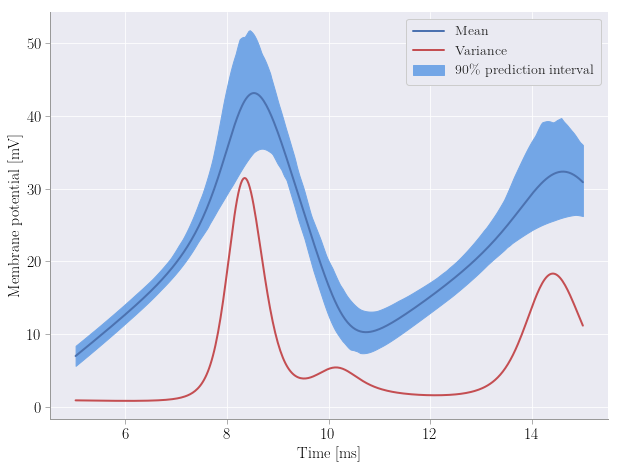

In [238]:
hh = un.Data("data/Valderrama.h5")
time = hh["Valderrama"]["time"]

labels = hh.get_labels("Valderrama")
xlabel, ylabel = labels

prettyPlot(time, hh["Valderrama"]["mean"],
           xlabel=xlabel,
           ylabel=ylabel,
           color=0,
           palette="deep")

colors = get_current_colormap()
plt.fill_between(time,
                 hh["Valderrama"]["percentile_5"],
                 hh["Valderrama"]["percentile_95"],
                 color=(0.45, 0.65, 0.9))

prettyPlot(time, hh["Valderrama"]["variance"],
           color=2,
           palette="deep",
           new_figure=False)


plt.legend(["Mean", "Variance", "90\% prediction interval"])
plt.savefig("figures/hh_prediction.eps")
plt.show()

## Sensitivity

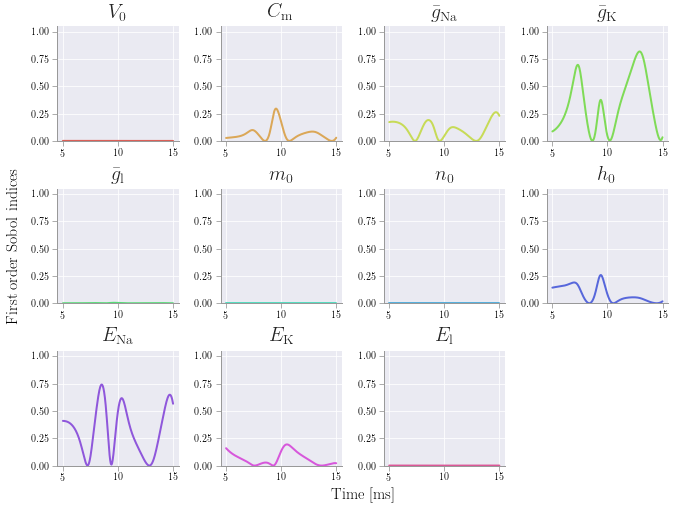

In [241]:
hh = un.Data("data/Valderrama.h5")
time = hh["Valderrama"]["time"]
sensitivity = hh["Valderrama"]["sensitivity_1"]

labels = hh.get_labels("Valderrama")
xlabel, ylabel = labels

nr_plots = len(hh.uncertain_parameters)
grid_size = np.ceil(np.sqrt(nr_plots))
grid_x_size = int(grid_size)
grid_y_size = int(np.ceil(nr_plots/float(grid_x_size)))

set_style("seaborn-darkgrid")
fig, axes = plt.subplots(nrows=grid_y_size, ncols=grid_x_size, squeeze=False, sharex='col', sharey='row')

# Add a larger subplot to use to set a common xlabel and ylabel
set_style("seaborn-white")
ax = fig.add_subplot(111, zorder=-10)
spines_color(ax, edges={"top": "None", "bottom": "None",
                        "right": "None", "left": "None"})
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.set_xlabel(xlabel)
ax.set_ylabel('First order Sobol indices', labelpad=15) 


for i in range(0, grid_x_size*grid_y_size):
    nx = i % grid_x_size
    ny = int(np.floor(i/float(grid_x_size)))

    ax = axes[ny][nx]

    if i < nr_plots:
        title = str_to_latex(hh.uncertain_parameters[i])
        
        if "gbar" in title:
            title = title.replace("gbar", "\\bar{g}")
        
        prettyPlot(time, sensitivity[i],
                   title=title, 
                   color=i,
                   nr_colors=nr_plots,
                   ax=ax,
                   palette="hls")

        ax.set_ylim([0, 1.05])
        ax.tick_params(labelsize=10)
    else:
        ax.axis("off")

plt.tight_layout()
plt.savefig("figures/hh_sensitivity.eps")
plt.show()

## Normalized sum of first order sobol indices

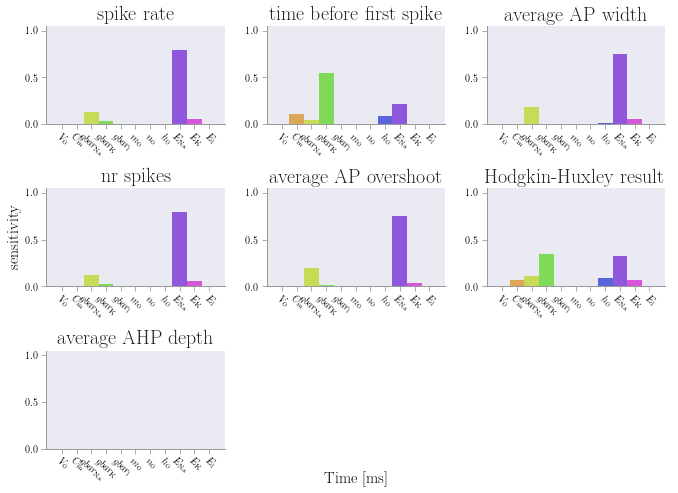

In [243]:
hh = un.Data("data/Valderrama.h5")

labels = hh.get_labels("Valderrama")
xlabel, ylabel = labels

features = hh.keys()
# No results for this feature
features.remove("accommodation_index")

nr_plots = len(features)
grid_size = np.ceil(np.sqrt(nr_plots))
grid_x_size = int(grid_size)
grid_y_size = int(np.ceil(nr_plots/float(grid_x_size)))

set_style("seaborn-dark")
fig, axes = plt.subplots(nrows=grid_y_size, ncols=grid_x_size, squeeze=False, sharex='col', sharey='row')


# Add a larger subplot to use to set a common xlabel and ylabel
set_style("seaborn-white")
ax = fig.add_subplot(111, zorder=-10)
spines_color(ax, edges={"top": "None", "bottom": "None",
                        "right": "None", "left": "None"})
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.set_xlabel(xlabel)
ax.set_ylabel('sensitivity') 

width = 0.2
index = np.arange(1, len(hh.uncertain_parameters)+1)*width


for i in range(0, grid_x_size*grid_y_size):
    nx = i % grid_x_size
    ny = int(np.floor(i/float(grid_x_size)))

    ax = axes[ny][nx]

    if i < nr_plots:      
        if features[i] == "Valderrama":
            title = "Hodgkin-Huxley result"
        else:
            title = features[i].replace("_", " ")

        prettyBar(hh[features[i]]["sensitivity_1_sum"],
                  title=title,
                  xlabels=list_to_latex(hh.uncertain_parameters),
                  nr_colors=len(hh.uncertain_parameters),
                  index=index,
                  ax=ax,
                  palette="hls")

        for tick in ax.get_xticklabels():
            tick.set_rotation(-40)

        ax.set_ylim([0, 1.05])
        # ax.set_xticklabels(xlabels, fontsize=labelsize, rotation=0)
        ax.tick_params(labelsize=10)
    else:
        ax.axis("off")

plt.tight_layout()
plt.savefig("figures/hh_total_sensitivity.eps")
plt.show()

# LGN plots

## Model results

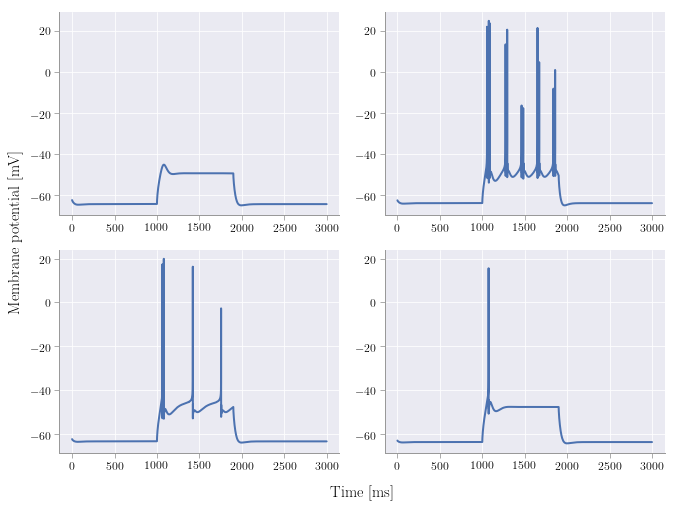

In [324]:
lgn = un.Data("data/lgn.h5")

U = lgn["NeuronModel"]["values"]
t = lgn["NeuronModel"]["time"]

labels = lgn.get_labels("NeuronModel")
xlabel, ylabel = labels


set_style("seaborn-darkgrid")
fig, axes = plt.subplots(2, 2, sharex='col', sharey='row')

set_style("seaborn-white")
ax = fig.add_subplot(111, zorder=-10)
spines_color(ax, edges={"top": "None", "bottom": "None",
                        "right": "None", "left": "None"})
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.set_xlabel(xlabel, fontsize=16, labelpad=15) 
ax.set_ylabel(ylabel, fontsize=16, labelpad=15)

nr_colors = 4
palette = "deep"

i = 0
indices = [19, 10, 1, 30]
for ax1 in axes:
    for ax in ax1:
        prettyPlot(t, U[indices[i]], ax=ax, color=0, palette=palette, nr_colors=nr_colors)
        ax=ax.tick_params(labelsize=12)
        i+=1

plt.tight_layout()
plt.savefig("figures/lgn_results.eps")
plt.show()

## Prediction interval

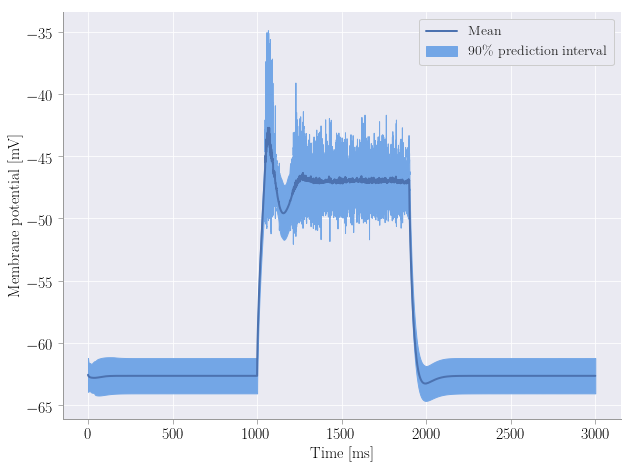

In [247]:
lgn = un.Data("data/lgn.h5")

time = lgn["NeuronModel"]["time"]

labels = lgn.get_labels("NeuronModel")
xlabel, ylabel = labels

prettyPlot(time, lgn["NeuronModel"]["mean"],
           xlabel=xlabel,
           ylabel=ylabel,
           color=0,
           palette="deep")

colors = get_current_colormap()
plt.fill_between(time,
                 lgn["NeuronModel"]["percentile_5"],
                 lgn["NeuronModel"]["percentile_95"],
                 color=(0.45, 0.65, 0.9))


plt.legend(["Mean", "90\% prediction interval"])
plt.savefig("figures/lgn_confidence.eps")
plt.show()

## Normalized sum of first order sobol indices

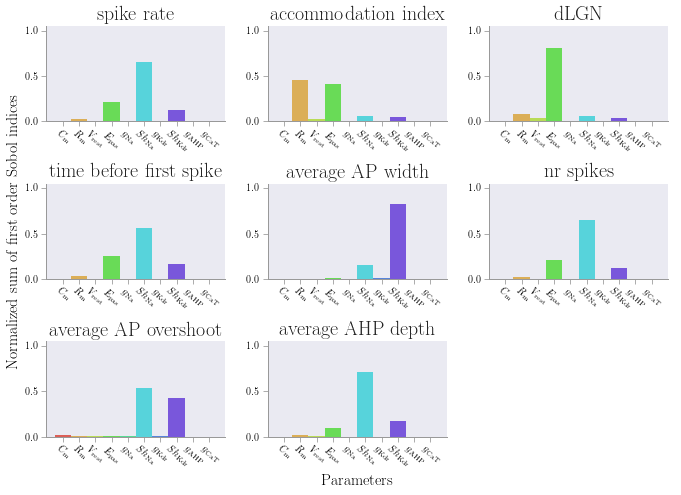

In [325]:
lgn = un.Data("data/lgn.h5")

time = lgn["NeuronModel"]["time"]
sensitivity = lgn["NeuronModel"]["sensitivity_1_sum"]

labels = lgn.get_labels("NeuronModel")
xlabel, ylabel = labels


features = lgn.keys()

nr_plots = len(features)
grid_size = np.ceil(np.sqrt(nr_plots))
grid_x_size = int(grid_size)
grid_y_size = int(np.ceil(nr_plots/float(grid_x_size)))

set_style("seaborn-dark")
fig, axes = plt.subplots(nrows=grid_y_size, ncols=grid_x_size, squeeze=False, sharex='col', sharey='row')

labels = lgn.get_labels("NeuronModel")
xlabel, ylabel = labels

# Add a larger subplot to use to set a common xlabel and ylabel
set_style("seaborn-white")
ax = fig.add_subplot(111, zorder=-10)
spines_color(ax, edges={"top": "None", "bottom": "None",
                        "right": "None", "left": "None"})
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.set_xlabel("Parameters", labelpad=20)
ax.set_ylabel('Normalized sum of first order Sobol indices') 
#ax.set_ylabel(r'$\hat{S}$') 

width = 0.2
index = np.arange(1, len(lgn.uncertain_parameters)+1)*width


latex_labels = {"cap": "$C_{\\mathrm{m}}$",
                "Vrest": "$V_{\\mathrm{rest}}$",
                "Rm": "$R_\\mathrm{m}$",
                "Epas": "$E_\\mathrm{pas}$",
                "gna": "$g_{\\mathrm{Na}}$",
                "nash": "$Sh_\\mathrm{Na}$",
                "gkdr": "$g_{\\mathrm{Kdr}}$",
                "kdrsh": "$Sh_{\\mathrm{Kdr}}$",
                "gahp": "$g_{\\mathrm{AHP}}$",
                "gcat": "$g_{\\mathrm{CaT}}$ ",
    
}

xlabels = []
for label in list_to_latex(lgn.uncertain_parameters):
    xlabels.append(latex_labels[label])

for i in range(0, grid_x_size*grid_y_size):
    nx = i % grid_x_size
    ny = int(np.floor(i/float(grid_x_size)))

    ax = axes[ny][nx]

    if i < nr_plots:      
        if features[i] == "NeuronModel":
            title = "dLGN"
        else:
            title = features[i].replace("_", " ")
        
        
        
        prettyBar(lgn[features[i]]["sensitivity_1_sum"],
                  title=title,
                  xlabels=xlabels,
                  nr_colors=len(lgn.uncertain_parameters),
                  index=index,
                  ax=ax,
                  palette="hls")

        for tick in ax.get_xticklabels():
            tick.set_rotation(-40)

        ax.set_ylim([0, 1.05])
        # ax.set_xticklabels(xlabels, fontsize=labelsize, rotation=0)
        ax.tick_params(labelsize=10)
    else:
        ax.axis("off")

plt.tight_layout()
plt.savefig("figures/lgn_sensitivity.eps")
plt.show()

# Brunel plots

In [18]:
def plot_2d(fig, ax, title, data, feature, attribute, t=True, auto=False, unit=None):
    #set_style("seaborn-dark")

    labels = data.get_labels(feature)
    xlabel, ylabel, zlabel = labels

    ax.set_title(title)
    
    if t:
        extent = [data[feature]["time"][0], data[feature]["time"][-1],
                  0, data[feature][attribute].shape[0]]
        aspect= "auto"
    else:
        extent = None
        aspect = "equal"
    
    if auto:
        aspect= "auto"

    iax = ax.imshow(data[feature][attribute], cmap="viridis", aspect=aspect,
                    extent=extent)

    
    if unit:
        zlabel = unit
        
    cbar = fig.colorbar(iax, ax=ax)
    #cbar.ax.set_title(zlabel)
    cbar.ax.set_ylabel(zlabel, labelpad=10)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [319]:
def plot_0d(ax, data, feature, title):
    
    width = 0.2
    distance = 0.5

    check_labels = ['eta', 'g', 'delay', 'J_E']
    xlabels = ["Mean", "Variance", "$P_5$", "$P_{95}$", "$\\eta$",
               "$g$", "$D$", "$J_\\mathrm{E}$"]
    xticks = [0, width, distance + width, distance + 2*width]

    values = [data[feature]["mean"], data[feature]["variance"],
              data[feature]["percentile_5"], data[feature]["percentile_95"]]

    ylabel = data.get_labels(feature)[0]

    prettyBar(values,
              ax=ax,
              index=xticks,
              xlabels=xlabels,
              ylabel=ylabel,
              title=title,
              palette=get_colormap_tableu20())
    
    pos = 2*distance + 2*width

    ax2 = ax.twinx()

    spines_color(ax2, edges={"top": "None", "bottom": "None",
                             "right": axis_grey, "left": "None"})
    ax2.tick_params(axis="y", which="both", right="on", left="off", labelright="on",
                    color=axis_grey, labelcolor="black", labelsize=labelsize)
    ax2.set_ylabel('First order Sobol indices', fontsize=fontsize)
    ax2.set_ylim([0, 1.05])


    i = 0
    legend_bars = []
    colors = get_colormap_tableu20()
    
    for parameter in data.uncertain_parameters:
        if parameter != check_labels[i]:
            raise RuntimeError("Parameters do not correspond to correct label")
            
        l = ax2.bar(pos, data[feature]["sensitivity_1"][i], width=width,
                    align='center', color=colors[4+i], linewidth=0)
        
    
        i += 1
        xticks.append(pos)
        pos += width
 
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels, fontsize=labelsize)
    
    
    
    ax.annotate("First order Sobol indices", xy=(0, 0), xytext=(0.58, -0.16), fontsize=labelsize, textcoords="axes fraction")
    
    for tick in ax.get_xticklabels()[:2]:
        tick.set_rotation(-35)


## Combined AI and SR

### Instantaneous rate

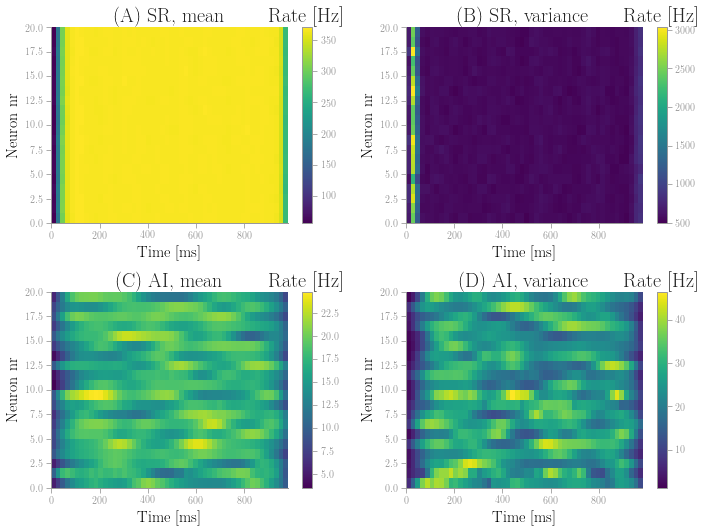

In [256]:
AI = un.Data("data/brunel_AI.h5")
SR = un.Data("data/brunel_SR.h5")

set_style("seaborn-dark")
fig, axes = plt.subplots(ncols=2, nrows=2)
plot_2d(fig, axes[0, 0], "(A) SR, mean", SR, "instantaneous_rate", "mean", t=True) 
plot_2d(fig, axes[0, 1], "(B) SR, variance", SR, "instantaneous_rate", "variance", t=True)
plot_2d(fig, axes[1, 0], "(C) AI, mean", AI, "instantaneous_rate", "mean", t=True)
plot_2d(fig, axes[1, 1], "(D) AI, variance", AI, "instantaneous_rate", "variance", t=True)

plt.tight_layout()
plt.savefig("figures/brunel_rate.eps")
plt.show()

## Normalized sum of the first order Sobol indices

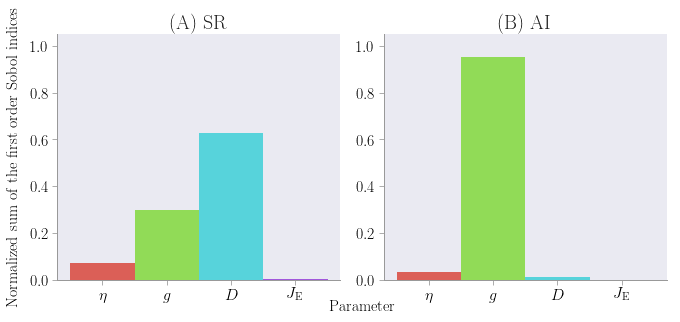

In [258]:
SR = un.Data("data/brunel_SR.h5")
AI = un.Data("data/brunel_AI.h5")

sensitivity_SR = SR["instantaneous_rate"]["sensitivity_1_sum"]
sensitivity_AI = AI["instantaneous_rate"]["sensitivity_1_sum"]

set_style("seaborn-dark")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

set_style("seaborn-white")
ax = fig.add_subplot(111, zorder=-10)
spines_color(ax, edges={"top": "None", "bottom": "None",
                        "right": "None", "left": "None"})
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.set_ylabel("Normalized sum of the first order Sobol indices", fontsize=16, labelpad=15) 
ax.set_xlabel("Parameter", fontsize=16)

width = 0.2
index = np.arange(1, len(SR.uncertain_parameters)+1)*width

xlabels = ["$\\eta$", "$g$", "$D$", "$J_\\mathrm{E}$"]

prettyBar(sensitivity_SR,
          title="(A) SR",
          xlabels=xlabels,
          nr_colors=len(SR.uncertain_parameters),
          index=index,
          ax=axes[0],
          palette="hls")

axes[0].set_ylim([0, 1.05])
prettyBar(sensitivity_AI,
          title="(B) AI",
          xlabels=xlabels,
          nr_colors=len(AI.uncertain_parameters),
          index=index,
          ax=axes[1],
          palette="hls")

axes[1].set_ylim([0, 1.05])
        
plt.tight_layout()
plt.savefig("figures/brunel_rate_sens.eps")
plt.show()

### Correlation Coefficient

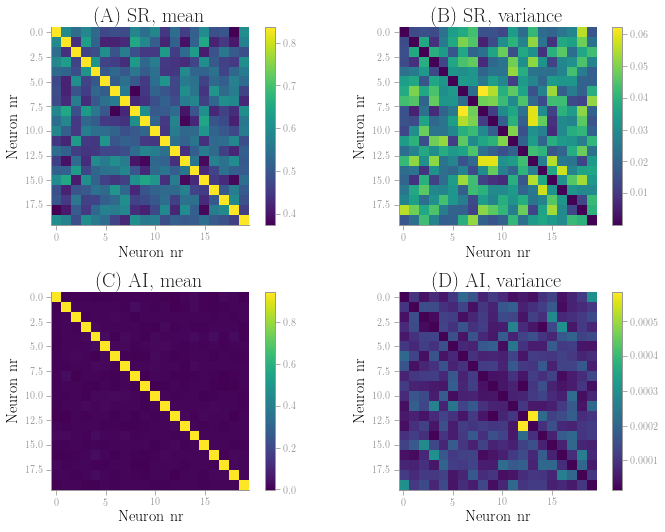

In [259]:
AI = un.Data("data/brunel_AI.h5")
SR = un.Data("data/brunel_SR.h5")

set_style("seaborn-dark")
fig, axes = plt.subplots(ncols=2, nrows=2)
plot_2d(fig, axes[0, 0], "(A) SR, mean", SR, "corrcoef", "mean", t=False) 
plot_2d(fig, axes[0, 1], "(B) SR, variance", SR, "corrcoef", "variance", t=False)
plot_2d(fig, axes[1, 0], "(C) AI, mean", AI, "corrcoef", "mean", t=False)
plot_2d(fig, axes[1, 1], "(D) AI, variance", AI, "corrcoef", "variance", t=False)

plt.tight_layout()
plt.savefig("figures/brunel_corrcoef.eps")
plt.show()

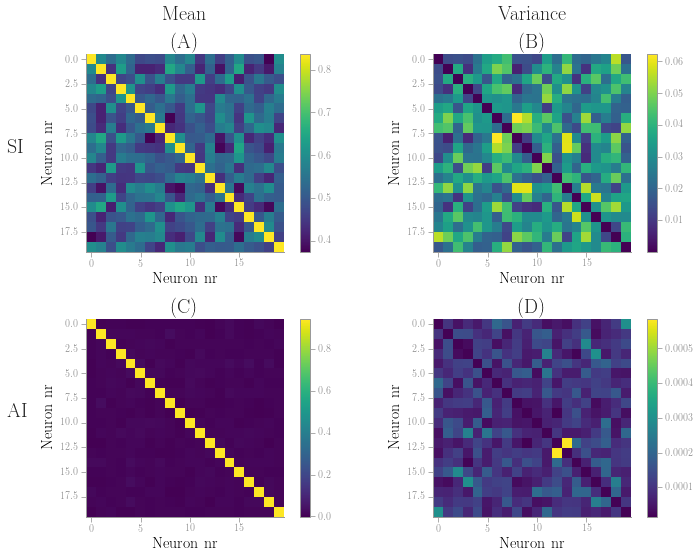

In [299]:
AI = un.Data("data/brunel_AI.h5")
SR = un.Data("data/brunel_SR.h5")

set_style("seaborn-dark")
fig, axes = plt.subplots(ncols=2, nrows=2)
plot_2d(fig, axes[0, 0], "(A)", SR, "corrcoef", "mean", t=False) 
plot_2d(fig, axes[0, 1], "(B)", SR, "corrcoef", "variance", t=False)
plot_2d(fig, axes[1, 0], "(C)", AI, "corrcoef", "mean", t=False)
plot_2d(fig, axes[1, 1], "(D)", AI, "corrcoef", "variance", t=False)


axes[0, 0].annotate("SI", xy=(0, 0), xytext=(-0.4, 0.5), fontsize=titlesize, textcoords="axes fraction")
axes[1, 0].annotate("AI", xy=(0, 0), xytext=(-0.4, 0.5), fontsize=titlesize, textcoords="axes fraction")

axes[0, 0].annotate("Mean", xy=(0, 0), xytext=(0.5, 1.17), fontsize=titlesize, textcoords="axes fraction", horizontalalignment="center")
axes[0, 1].annotate("Variance", xy=(0, 0), xytext=(0.5, 1.17), fontsize=titlesize, textcoords="axes fraction", horizontalalignment="center")

plt.tight_layout()
plt.savefig("figures/brunel_corrcoef.eps")
plt.show()

## Normalized sum of the first order Sobol indices

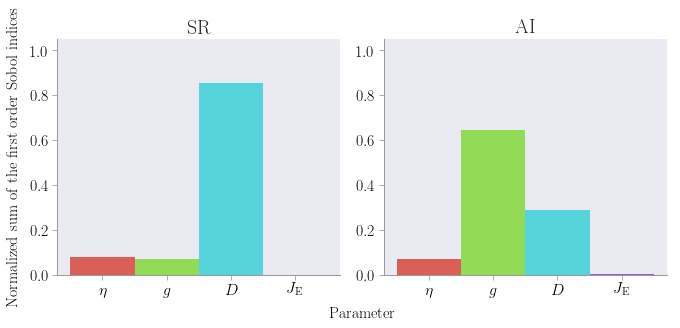

In [264]:
SR = un.Data("data/brunel_SR.h5")
AI = un.Data("data/brunel_AI.h5")

sensitivity_SR = SR["corrcoef"]["sensitivity_1_sum"]
sensitivity_AI = AI["corrcoef"]["sensitivity_1_sum"]

set_style("seaborn-dark")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

set_style("seaborn-white")
ax = fig.add_subplot(111, zorder=-10)
spines_color(ax, edges={"top": "None", "bottom": "None",
                        "right": "None", "left": "None"})
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.set_ylabel("Normalized sum of the first order Sobol indices", fontsize=16, labelpad=15) 
ax.set_xlabel("Parameter", fontsize=16, labelpad=15)



xlabels = ["$\\eta$", "$g$", "$D$", "$J_\\mathrm{E}$"]

width = 0.2
index = np.arange(1, len(SR.uncertain_parameters)+1)*width

prettyBar(sensitivity_SR,
          title="SR",
          xlabels=xlabels,
          nr_colors=len(SR.uncertain_parameters),
          index=index,
          ax=axes[0],
          palette="hls")

axes[0].set_ylim([0, 1.05])
prettyBar(sensitivity_AI,
          title="AI",
          xlabels=xlabels,
          nr_colors=len(SR.uncertain_parameters),
          index=index,
          ax=axes[1],
          palette="hls")

axes[1].set_ylim([0, 1.05])


    
plt.tight_layout()
plt.savefig("figures/brunel_corrcoef_sens.eps")
plt.show()

## Correlation coefficient with sensitivity

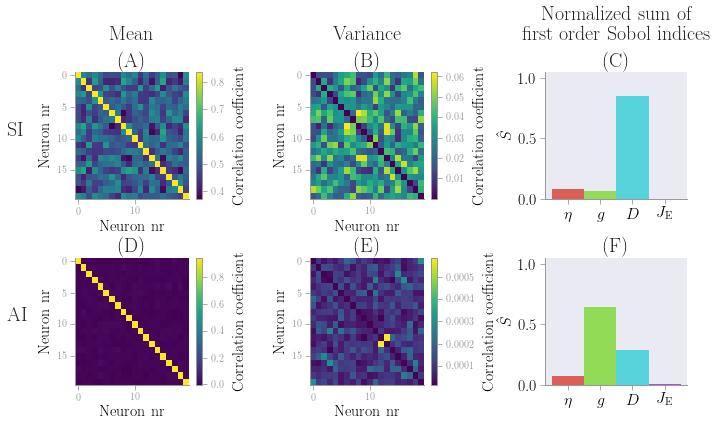

In [23]:
AI = un.Data("data/brunel_AI.h5")
SR = un.Data("data/brunel_SR.h5")

sensitivity_SR = SR["corrcoef"]["sensitivity_1_sum"]
sensitivity_AI = AI["corrcoef"]["sensitivity_1_sum"]

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 6))
plot_2d(fig, axes[0, 0], "(A)", SR, "corrcoef", "mean", t=False, auto=True, unit="Correlation coefficient") 
plot_2d(fig, axes[0, 1], "(B)", SR, "corrcoef", "variance", t=False, auto=True, unit="Correlation coefficient")
plot_2d(fig, axes[1, 0], "(D)", AI, "corrcoef", "mean", t=False, auto=True, unit="Correlation coefficient")
plot_2d(fig, axes[1, 1], "(E)", AI, "corrcoef", "variance", t=False, auto=True, unit="Correlation coefficient")

        
aspect = np.abs(np.diff(axes[0, 0].get_xlim())[0] / np.diff(axes[0, 0].get_ylim())[0])
    
xlabels = ["$\\eta$", "$g$", "$D$", "$J_\\mathrm{E}$"]

width = 0.2
index = np.arange(1, len(SR.uncertain_parameters)+1)*width

prettyBar(sensitivity_SR,
          title="(C)",
          xlabels=xlabels,
          ylabel=r"$\hat{S}$",
          nr_colors=len(SR.uncertain_parameters),
          index=index,
          ax=axes[0, 2],
          palette="hls")

axes[0, 2].set_ylim([0, 1.05])

prettyBar(sensitivity_AI,
          title="(F)",
          xlabels=xlabels,
          ylabel=r"$\hat{S}$",
          nr_colors=len(SR.uncertain_parameters),
          index=index,
          ax=axes[1, 2],
          palette="hls")

axes[1, 2].set_ylim([0, 1.05])     

    
plt.tight_layout()

axes[0, 0].annotate("SI", xy=(0, 0), xytext=(-0.6, 0.5), fontsize=titlesize, textcoords="axes fraction")
axes[1, 0].annotate("AI", xy=(0, 0), xytext=(-0.6, 0.5), fontsize=titlesize, textcoords="axes fraction")

axes[0, 0].annotate("Mean", xy=(0, 0), xytext=(0.5, 1.25), fontsize=titlesize, textcoords="axes fraction", horizontalalignment="center")
axes[0, 1].annotate("Variance", xy=(0, 0), xytext=(0.5, 1.25), fontsize=titlesize, textcoords="axes fraction", horizontalalignment="center")
axes[0, 1].annotate("Normalized sum of\nfirst order Sobol indices", xy=(0, 0), xytext=(2.7, 1.25), fontsize=titlesize, textcoords="axes fraction", horizontalalignment="center")


plt.subplots_adjust(top=0.83, left=0.11, right=0.96)


plt.savefig("figures/brunel_corrcoef.eps")
plt.show()

### Mean CV

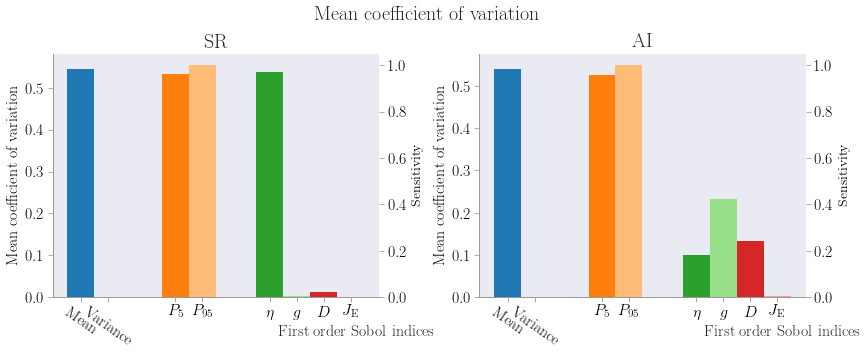

In [316]:
SR = un.Data("data/brunel_SR.h5")
AI = un.Data("data/brunel_AI.h5")

fig, axes = plt.subplots(ncols=2, sharey=False,  figsize=(12, 5))


plot_0d(axes[0], SR, "mean_cv", "SR")
plot_0d(axes[1], AI, "mean_cv", "AI")


plt.suptitle("Mean coefficient of variation", fontsize=titlesize)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig("figures/brunel_cv.eps")
plt.show()

### Mean ISI

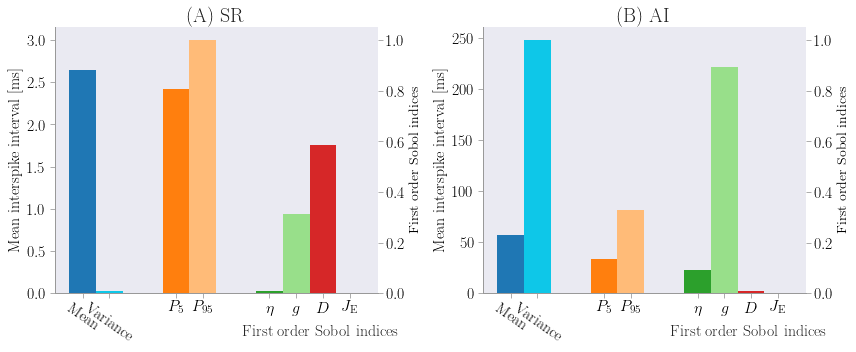

In [329]:
SR = un.Data("data/brunel_SR.h5")
AI = un.Data("data/brunel_AI.h5")

fig, axes = plt.subplots(ncols=2, sharey=False,  figsize=(12, 5))


plot_0d(axes[0], SR, "mean_isi", "(A) SR")
plot_0d(axes[1], AI, "mean_isi", "(B) AI")


plt.tight_layout()
plt.savefig("figures/brunel_isi.eps")
plt.show()

### Sensitivity

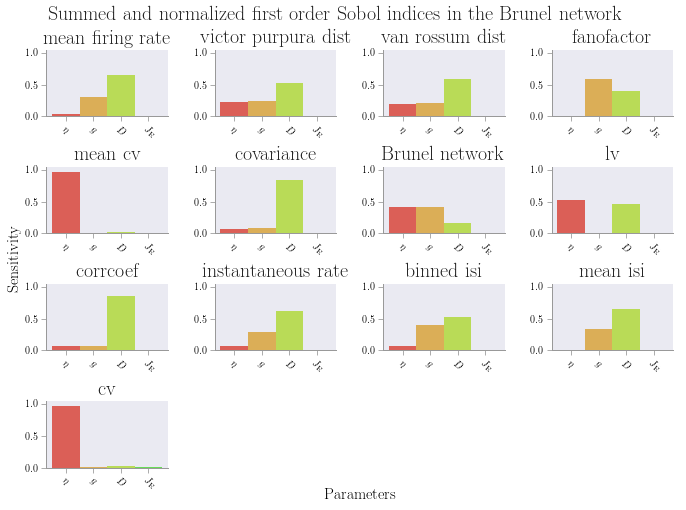

In [24]:
SR = un.Data("data/brunel_SR.h5")

t = SR["brunel_network"]["t"]
sensitivity = SR["brunel_network"]["total_sensitivity_1"]

labels = SR.get_labels("brunel_network")
xlabel, ylabel, zlabel = labels


features = SR.keys()

nr_plots = len(features)
grid_size = np.ceil(np.sqrt(nr_plots))
grid_x_size = int(grid_size)
grid_y_size = int(np.ceil(nr_plots/float(grid_x_size)))

set_style("seaborn-dark")
fig, axes = plt.subplots(nrows=grid_y_size, ncols=grid_x_size, squeeze=False, sharex='col', sharey='row')

labels = SR.get_labels("brunel_network")
xlabel, ylabel, zlabel = labels

# Add a larger subplot to use to set a common xlabel and ylabel
set_style("seaborn-white")
ax = fig.add_subplot(111, zorder=-10)
spines_color(ax, edges={"top": "None", "bottom": "None",
                        "right": "None", "left": "None"})
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.set_xlabel("Parameters")
ax.set_ylabel('Sensitivity') 

width = 0.2
index = np.arange(1, len(SR.uncertain_parameters)+1)*width


latex_labels = {"eta": "$\\eta$",
                "J_E": "$J_\\mathrm{E}$",
                "g": "$g$",
                "delay": "$D$"}


xlabels = []
for label in SR.uncertain_parameters:
    xlabels.append(latex_labels[label])

for i in range(0, grid_x_size*grid_y_size):
    nx = i % grid_x_size
    ny = int(np.floor(i/float(grid_x_size)))

    ax = axes[ny][nx]

    if i < nr_plots:      
        if features[i] == "brunel_network":
            title = "Brunel network"
        else:
            title = features[i].replace("_", " ")
        
        
        
        prettyBar(SR[features[i]]["total_sensitivity_1"],
                  title=title,
                  xlabels=xlabels,
                  nr_colors=len(lgn.uncertain_parameters),
                  index=index,
                  ax=ax,
                  palette="hls")

        for tick in ax.get_xticklabels():
            tick.set_rotation(-40)

        ax.set_ylim([0, 1.05])
        # ax.set_xticklabels(xlabels, fontsize=labelsize, rotation=0)
        ax.tick_params(labelsize=10)
    else:
        ax.axis("off")

title = "Summed and normalized first order Sobol indices in the Brunel network"
plt.suptitle(title, fontsize=titlesize)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("figures/brunel_sensitivity.eps")
plt.show()

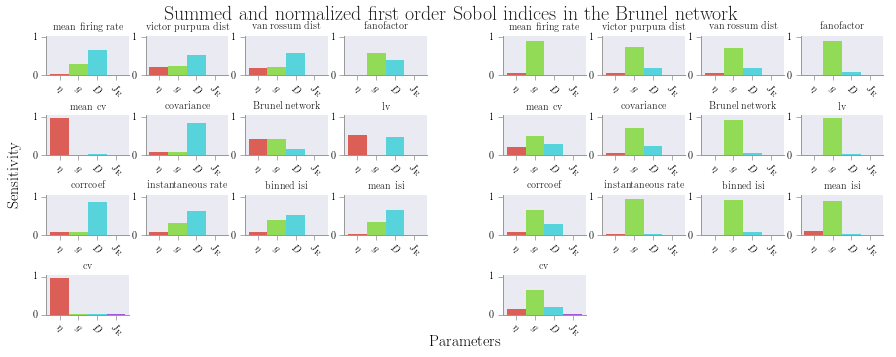

In [25]:
import matplotlib.gridspec as gridspec

SR = un.Data("data/brunel_SR.h5")
AI = un.Data("data/brunel_AI.h5")

data_set = [SR, AI]


fig = plt.figure(figsize=(15, 5))
outer = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.2)


for i in range(2):
    data = data_set[i]
    
    features = data.keys()

    nr_plots = len(features)
    grid_size = np.ceil(np.sqrt(nr_plots))
    grid_x_size = int(grid_size)
    grid_y_size = int(np.ceil(nr_plots/float(grid_x_size)))

    set_style("seaborn-dark")

    inner = gridspec.GridSpecFromSubplotSpec(grid_x_size, grid_y_size,
                                             subplot_spec=outer[i], wspace=0.2, hspace=1)

    
    sensitivity = data["brunel_network"]["total_sensitivity_1"]


    labels = data.get_labels("brunel_network")
    xlabel, ylabel, zlabel = labels
    
    width = 0.2
    index = np.arange(1, len(data.uncertain_parameters)+1)*width


    latex_labels = {"eta": "$\\eta$",
                    "J_E": "$J_\\mathrm{E}$",
                    "g": "$g$",
                    "delay": "$D$"}


    xlabels = []
    for label in SR.uncertain_parameters:
        xlabels.append(latex_labels[label])

    for j in range(0, grid_x_size*grid_y_size):
        #nx = i % grid_x_size
        #ny = int(np.floor(i/float(grid_x_size)))
        #ax = axes[ny][nx]

        ax = plt.Subplot(fig, inner[j])

        if j < nr_plots:      
            if features[j] == "brunel_network":
                title = "Brunel network"
            else:
                title = features[j].replace("_", " ")



            prettyBar(data[features[j]]["total_sensitivity_1"],
                      title=title,
                      xlabels=xlabels,
                      nr_colors=len(data.uncertain_parameters),
                      index=index,
                      ax=ax,
                      palette="hls",
                      titlesize=10)
            
            #ax.set_title(title, fontsize=titlesize)

            for tick in ax.get_xticklabels():
                tick.set_rotation(-40)

            ax.set_ylim([0, 1.05])
            # ax.set_xticklabels(xlabels, fontsize=labelsize, rotation=0)
            ax.tick_params(labelsize=10)
        else:
            ax.axis("off")
        
        fig.add_subplot(ax)
        plt.tight_layout(outer[i])
        
        
# Add a larger subplot to use to set a common xlabel and ylabel
set_style("seaborn-white")
ax = fig.add_subplot(111, zorder=-10)
spines_color(ax, edges={"top": "None", "bottom": "None",
                        "right": "None", "left": "None"})
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.set_xlabel("Parameters")
ax.set_ylabel('Sensitivity') 

title = "Summed and normalized first order Sobol indices in the Brunel network"
plt.suptitle(title, fontsize=titlesize)
plt.subplots_adjust(top=0.9)
plt.savefig("figures/brunel_sensitivity.eps")
plt.show()